# Animal Pie Chart

Uses matplotlib to create a pie chart of the relative percentages of the animals in the SEND database. 

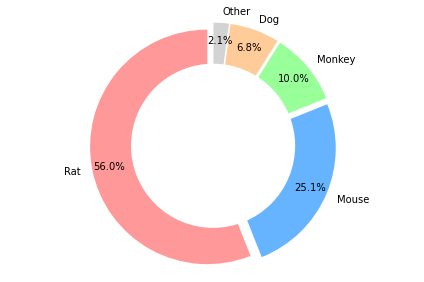

In [3]:
from send import send_db
import matplotlib.pyplot as plt
import os

animals = send_db.get_all_animals()

animals.loc[animals.SPECIES.isin(['GUINEA PIG', 'CAT', 'MINIPIG', 'PIG', 'RABBIT']), 'SPECIES'] = 'OTHER'

animals.SPECIES = animals.SPECIES.str.title()

species_counts = animals.SPECIES.value_counts()

# Pie chart
labels = species_counts.index
sizes = species_counts.values
# colors
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#D3D3D3']
# explsion
explode = [0.05]*len(labels)

fig1, ax1 = plt.subplots()

plt.pie(sizes,
        colors=colors,
        # wedgeprops = {'linewidth': 1, 'edgecolor':'k'},
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        pctdistance=0.85,
        explode=explode,
        )
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.savefig(os.path.join('figures', 'animals.png'), transparent=True)